In [1]:
# import the libraries as shown below
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.xception import Xception
from keras.applications.xception import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
     r"C:\Users\madhu\Desktop\Skin Cancer\dataset1\train",
    seed=123,
    shuffle=True,
    image_size=(224,224),
    batch_size=32
)

Found 2974 files belonging to 3 classes.


In [3]:
class_names = list(train_generator.class_indices.keys())
class_names

NameError: name 'train_generator' is not defined

In [ ]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break
#     count+=1
#     if count>2:
#         break

In [5]:
class_names = dataset.class_names
class_names

['Chickenpox', 'Healthy skin', 'Measles', 'Monkeypox']

In [4]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 224, 224, 3)
[0 2 0 1 1 2 1 1 1 1 0 0 1 0 0 1 0 0 0 0 2 0 0 0 1 1 1 1 1 2 2 2]


NameError: name 'class_names' is not defined

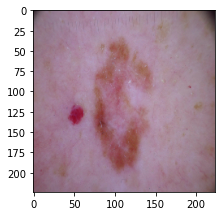

In [5]:
plt.figure(figsize=(15, 15
                   ))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [6]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

In [7]:
train_path =   r"C:\Users\madhu\Desktop\Skin Cancer\dataset1\train"
valid_path =    r"C:\Users\madhu\Desktop\Skin Cancer\dataset1\val"

In [8]:
# add preprocessing layer to the front of VGG
xception = Xception(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [10]:
# don't train existing weights
for layer in xception.layers:
    layer.trainable = False

In [11]:
# our layers - you can add more if you want
x = Flatten()(xception.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(3, activation='softmax')(x)

In [12]:
# create a model object
model = Model(inputs=xception.input, outputs=prediction)

In [13]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                             

In [14]:
# tell the model what cost and optimization method to use
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
    
)

In [15]:
from keras.preprocessing.image import ImageDataGenerator

training_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.3,
                                   zoom_range = 0.2,
                                   rotation_range=10,
                                   horizontal_flip = True)

training_generator = training_datagen.flow_from_directory( r"C:\Users\madhu\Desktop\Skin Cancer\dataset1\train",
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'sparse')



Found 2974 images belonging to 3 classes.


In [17]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range = 0.3,
        zoom_range = 0.2,
        rotation_range=10,
        horizontal_flip=True)

validation_generator = validation_datagen.flow_from_directory(
         r"C:\Users\madhu\Desktop\Skin Cancer\dataset1\val",
        target_size=(224,224),
        batch_size=32,
        class_mode="sparse"
)

Found 371 images belonging to 3 classes.


In [18]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_set = test_datagen.flow_from_directory( r"C:\Users\madhu\Desktop\Skin Cancer\dataset1\test",
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'sparse')


Found 374 images belonging to 3 classes.


In [ ]:
'''from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 10, 
                                        restore_best_weights = True)

In [19]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_generator,
  validation_data=validation_generator,
  epochs=75,
  steps_per_epoch=len(training_generator),
  validation_steps=len(validation_generator),
  verbose=1,
    #callbacks=[earlystopping]
)

Epoch 1/75
93/93 [==============================] - 218s 2s/step - loss: 2.6631 - accuracy: 0.6093 - val_loss: 1.5607 - val_accuracy: 0.6739
Epoch 2/75
93/93 [==============================] - 208s 2s/step - loss: 1.3628 - accuracy: 0.7135 - val_loss: 1.7065 - val_accuracy: 0.6685
Epoch 3/75
93/93 [==============================] - 205s 2s/step - loss: 1.3328 - accuracy: 0.7266 - val_loss: 1.4789 - val_accuracy: 0.7278
Epoch 4/75
93/93 [==============================] - 204s 2s/step - loss: 1.4605 - accuracy: 0.7448 - val_loss: 1.8815 - val_accuracy: 0.6765
Epoch 5/75
93/93 [==============================] - 206s 2s/step - loss: 1.2192 - accuracy: 0.7727 - val_loss: 2.1816 - val_accuracy: 0.7062
Epoch 6/75
93/93 [==============================] - 215s 2s/step - loss: 1.1521 - accuracy: 0.7895 - val_loss: 1.6906 - val_accuracy: 0.6792
Epoch 7/75
93/93 [==============================] - 208s 2s/step - loss: 1.0967 - accuracy: 0.8003 - val_loss: 1.9899 - val_accuracy: 0.7197
Epoch 8/75
93

In [20]:
 scores = model.evaluate(test_set)

12/12 [==============================] - 15s 1s/step - loss: 3.7424 - accuracy: 0.7567


In [21]:
acc = r.history['accuracy']
val_acc = r.history['val_accuracy']

loss = r.history['loss']
val_loss = r.history['val_loss']

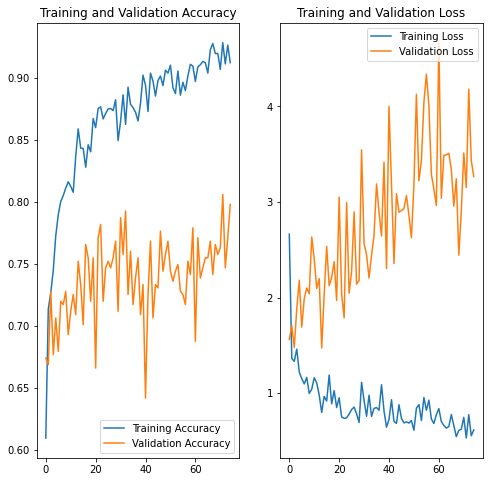

In [22]:
EPOCHS = 75

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict


NameError: name 'class_names' is not defined

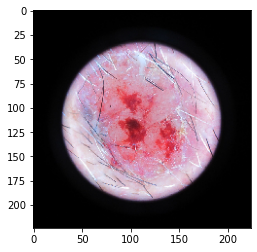

In [23]:
import numpy as np


for image_batch, label_batch in test_set:
    first_image = image_batch[0]
    first_label = int(labels_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

In [24]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 74ms/step


NameError: name 'class_names' is not defined

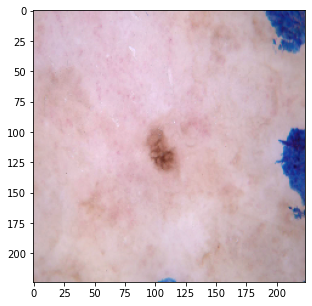

In [26]:
plt.figure(figsize=(17, 17))
for images, labels in test_set:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break